# Movie Review Classification Project

***

### Import necessary libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

### Read the dataset

In [2]:
df = pd.read_csv('movie_data.csv')

In [3]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


### Check the info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49969 entries, 0 to 49968
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49969 non-null  object
 1   sentiment  49969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 780.9+ KB


### Lets slice the data to reduce training time

In [14]:
df = df.head(10000)

### Check for imbalanced data

In [15]:
df['sentiment'].value_counts()

1    5043
0    4957
Name: sentiment, dtype: int64

<Axes: ylabel='sentiment'>

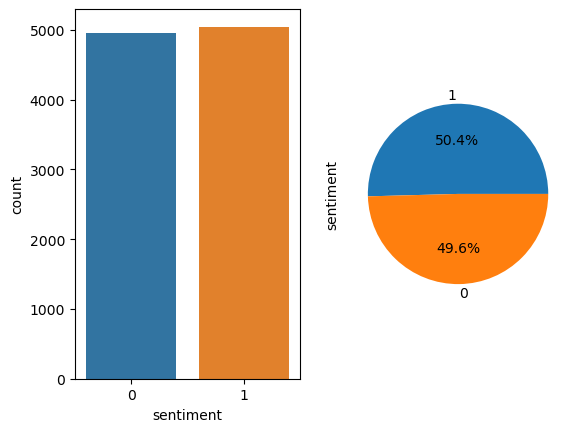

In [16]:
plt.subplot(1,2,1)
sns.countplot(x=df['sentiment'])

plt.subplot(1,2,2)
df['sentiment'].value_counts().plot(kind='pie',autopct = "%1.1f%%")

### Create a function to preprocess the review column

In [12]:
def preprocess(sentence):
    text = re.sub(r"[^a-z0-9A-Z]"," ",sentence).split()
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words]
    
    word = ' '.join(word)
    return word

### Print some text after preprocessing the function

In [17]:
df['review'] = df['review'].apply(preprocess)

In [18]:
for i in range(5):
    print(df['review'][i])
    print()

this movie crap even though directors claim part oi culture still bad directorial debut the topic interest i accept bad act due fact amateurs never act worst thing film dialogs unexperienced naive direct there time movie i felt like directors exit movie first feature actually never really ask story wanna tell i meet ben one directors several occasion nice thoughtful guy make director i think american history x full clich somehow manage transport story oi warn full clich tell anything new provocative sad thing movie far oi reality br br if wanna see weird great german film watch movies michael haneke christoph schlingensief oskar roehler hans weingartner oliver hirschbiegel br br benny video funny game die unber hrbare mein letzter film das experiment das weisse rauschen muxm uschenstill br br ten topic photography

another detail work subject dr dwivedi take us back time pre partioned panjab dr dwivedi choose difficult subject movie debut he work meticulous detail bring story life the 

### Split the data into input(X) and target(Y) variable

In [19]:
x = df['review']
y = df['sentiment']

### Create text tokenizer object with 5000 max words

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#Convert text to sequence
#Add padding

In [21]:
tokenizer = Tokenizer(num_words=5000)

### Split the data into training and testing set

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Create Keras sequential model with LSTM layers

In [23]:
tokenizer.fit_on_texts(x_train)

In [24]:
vocab_size = len(tokenizer.word_index)+1

In [25]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=128)    
       
    return padded_sequence

In [26]:
x_train = text_encoding(x_train)
x_test = text_encoding(x_test)

In [27]:
from keras import Sequential
from keras import layers

In [28]:
model=Sequential([
    layers.Embedding(vocab_size,128),
    layers.LSTM(128,return_sequences=True),
    layers.Dropout(0.02),
    layers.LSTM(128),
    layers.Dropout(0.02),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.02),
    layers.Dense(1,activation='sigmoid')
])

### Compile the model

In [30]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =["accuracy"])

### Train the model with our training set

In [31]:
model.fit(x_train,y_train,epochs=10, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 30s 135ms/step - accuracy: 0.6556 - loss: 0.5834 - val_accuracy: 0.8506 - val_loss: 0.3567
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 130ms/step - accuracy: 0.9036 - loss: 0.2452 - val_accuracy: 0.8650 - val_loss: 0.3237
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 130ms/step - accuracy: 0.9454 - loss: 0.1500 - val_accuracy: 0.8444 - val_loss: 0.4595
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 130ms/step - accuracy: 0.9724 - loss: 0.0763 - val_accuracy: 0.8438 - val_loss: 0.5025
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 124ms/step - accuracy: 0.9852 - loss: 0.0442 - val_accuracy: 0.8369 - val_loss: 0.7577
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 127ms/step - accuracy: 0.9858 - loss: 0.0447 - val_accuracy: 0.8344 - val_loss: 0.6642
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 133ms/step - accuracy: 0.9899 - loss: 0.0321 - val_accuracy: 0.8325 - val_loss: 0.6202
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - accuracy: 0.9902 - loss: 0

### Make prediction with x_test

In [32]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step


In [33]:
y_pred[0]

array([0.00121946], dtype=float32)

### Convert to 0 and 1 with higher probability towards 1

In [34]:
pred = []
for i in y_pred:
    if i>0.5:
        pred.append(1)
    else:
        pred.append(0)

### Evaluate the model

In [35]:
model.evaluate(x_train,y_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9965 - loss: 0.0253


[0.22299499809741974, 0.9681249856948853]

### Check the accuarcy score

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
accuracy_score(y_test,pred)

0.837

### Check the confusion matrix

<Axes: >

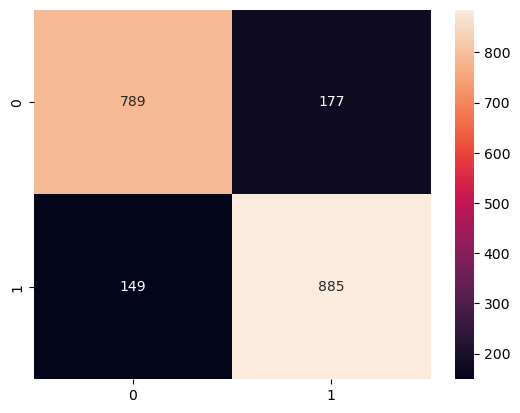

In [38]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

***